### Install Detectron

In [2]:
!python3 -m pip install --upgrade torch torchvision torchaudio opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.1
    Uninstalling torchvision-0.18.1:
      Successfully uninstalled torchvision-0.18.1
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.3.1
    Uninstalling torchaudio-2.3.1:
      Successfully uninstalled torchaudio-2.3.1


In [3]:
!python3 -m pip install --upgrade pip setuptools

  Using cached setuptools-72.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-72.1.0-py3-none-any.whl (2.3 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 70.2.0
    Uninstalling setuptools-70.2.0:
      Successfully uninstalled setuptools-70.2.0


In [4]:
!git clone 'https://github.com/facebookresearch/detectron2'

fatal: destination path 'detectron2' already exists and is not an empty directory.


In [5]:
import os
os.chdir('detectron2')

In [58]:
with open('setup.py', 'r') as file:
    setup_contents = file.read()

setup_contents = setup_contents.replace('import distutils.core', 'import setuptools')

with open('setup.py', 'w') as file:
    file.write(setup_contents)

In [7]:
!python3 -m pip install --upgrade pip setuptools wheel

  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
Using cached wheel-0.43.0-py3-none-any.whl (65 kB)


In [10]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.9/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.9/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [12]:
import torch, detectron2

In [13]:
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

zsh:1: command not found: nvcc
torch:  2.4 ; cuda:  2.4.0
detectron2: 0.6


In [17]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import cv2

# import some common detectron2 utilities
# from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [18]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg

In [19]:
im = cv2.imread('../books.jpg')

In [20]:
# cv2.imshow("check",im)
# cv2.waitKey(0) 
# cv2.destroyAllWindows() 

In [21]:
import torch

# Check if MPS is available (for macOS 12.3+)
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# print(f"Using device: {device}")

In [22]:
import certifi
import os

os.environ['SSL_CERT_FILE'] = certifi.where()


In [26]:
from detectron2.model_zoo import model_zoo
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2
import matplotlib.pyplot as plt

# Check if MPS is available and set the device
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# Set environment variables to ensure Detectron2 uses MPS
import os
os.environ["DETECTRON2_DEVICE"] = "mps"

# Configure the Detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = device.type  # Ensure the model uses the MPS device

# Create a predictor
predictor = DefaultPredictor(cfg)

# Provide the path to your input image
im = cv2.imread("../books.jpg")

# Perform inference
outputs = predictor(im)

# Visualize the results
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(14, 10))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()


Using device: mps
[08/02 15:01:20 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13XFamilyCommandBuffer: 0x104cdcbe0>
    label = <none> 
    device = <AGXG13XDevice: 0x13621fe00>
        name = Apple M1 Pro 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x134c40e00>
        label = <none> 
        device = <AGXG13XDevice: 0x13621fe00>
            name = Apple M1 Pro 
    retainedReferences = 1
Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded

RuntimeError: Expected repeatBuffer && cumsumBuffer && resultBuffer to be true, but got false.  (Could this error message be improved?  If so, please report an enhancement request to PyTorch.)

Using device: mps


/Users/surbhitkumar/Desktop/personal-proj/ProcessVision/.venv/lib/python3.11/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Internal Error (0000000e:Internal Error)
	<AGXG13XFamilyCommandBuffer: 0x3595157d0>
    label = <none> 
    device = <AGXG13XDevice: 0x132454600>
        name = Apple M1 Pro 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x134132e00>
        label = <none> 
        device = <AGXG13XDevice: 0x132454600>
            name = Apple M1 Pro 
    retainedReferences = 1
Error: command buffer exited with error status.
	The Metal Performance Shaders operati

MPS failed with error: Expected repeatBuffer && cumsumBuffer && resultBuffer to be true, but got false.  (Could this error message be improved?  If so, please report an enhancement request to PyTorch.). Falling back to CPU.


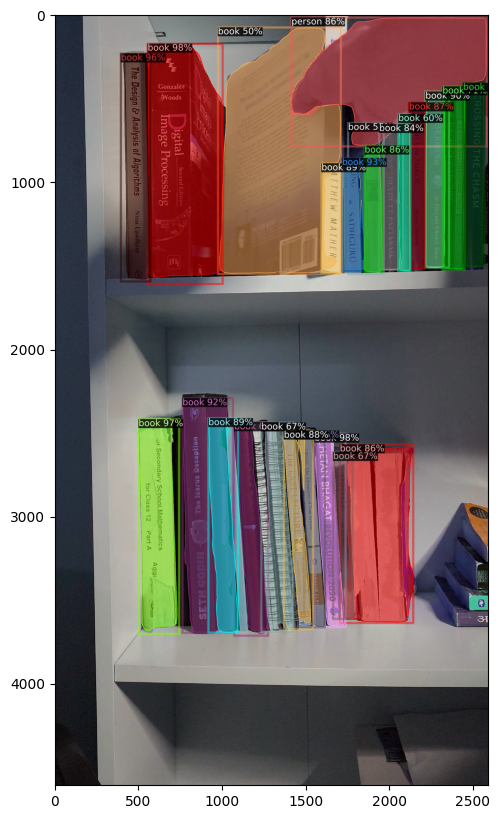

In [2]:
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from research.detectron2.detectron2 import (model_zoo)
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2
import matplotlib.pyplot as plt
import os

# Check if MPS is available and set the device
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# Set environment variables to ensure Detectron2 uses MPS
os.environ["DETECTRON2_DEVICE"] = "mps"

# Configure the Detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = device.type  # Ensure the model uses the MPS device

# Create a predictor
predictor = DefaultPredictor(cfg)

# Provide the path to your input image
image_path = "./frames/frame420.jpg"  # Change this to the correct path

# Check if the file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The file {image_path} does not exist.")

# Read the image using OpenCV
im = cv2.imread(image_path)

# Check if the image was successfully loaded
if im is None:
    raise ValueError(f"Could not read the image {image_path}. Check the file path and integrity.")

# Perform inference with a fallback to CPU if MPS fails
try:
    outputs = predictor(im)
except RuntimeError as e:
    print(f"MPS failed with error: {e}. Falling back to CPU.")
    cfg.MODEL.DEVICE = "cpu"  # Switch to CPU
    predictor = DefaultPredictor(cfg)
    outputs = predictor(im)

# Visualize the results
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(14, 10))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()


In [3]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,  0, 73, 73, 73, 73,
        73, 73, 73, 73, 73, 73])
Boxes(tensor([[ 460.5435,  143.5937,  833.7961, 1341.2362],
        [1291.3691, 2087.9587, 1446.1562, 3051.4915],
        [ 415.6373, 2015.5186,  617.8905, 3085.4524],
        [ 327.3421,  192.3406,  474.3635, 1328.5637],
        [2030.5106,  339.0443, 2136.9185, 1253.9419],
        [1428.4374,  713.3912, 1530.2471, 1278.0168],
        [ 634.0084, 1911.1873,  885.0186, 3080.4590],
        [1842.9440,  382.0593, 1960.6165, 1259.4534],
        [1326.1198,  740.2901, 1437.4137, 1284.6624],
        [ 763.5295, 2011.0029,  910.7032, 3080.0620],
        [1139.1617, 2073.2871, 1283.0365, 3062.9219],
        [1762.0406,  436.3701, 1840.7095, 1265.7979],
        [1540.8823,  651.4246, 1629.0134, 1280.1824],
        [1176.5554,   12.4560, 2148.1133,  655.1647],
        [1417.9117, 2141.4539, 1782.6926, 3031.2776],
        [1191.8555, 2072.6775, 1342.2555, 3053.1030],
        [1613.352

In [4]:
import cv2
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from research.detectron2.detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Configure the Detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"  # Use CPU for inference

# Create a predictor
predictor = DefaultPredictor(cfg)

# Provide the path to your input video
video_path = "./vids/20240617_210510.mp4"
output_video_path = "./output_video_stream.mp4"

# Read the video using OpenCV
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the frame
    outputs = predictor(frame)

    # Visualize the results
    v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out_frame = v.draw_instance_predictions(outputs["instances"].to("cpu")).get_image()[:, :, ::-1]

    # Write the frame to the output video
    out.write(out_frame)

    # Optional: Display the frame
    cv2.imshow('Frame', out_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video objects
cap.release()
out.release()
cv2.destroyAllWindows()


2024-08-02 15:08:23.007 Python[77727:22009997] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
2024-08-02 15:08:57.287 Python[77727:22009997] Warning: Window move completed without beginning


KeyboardInterrupt: 